In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [8]:
df=pd.read_csv('D:/german_credit_data.csv')

In [9]:
# 数据清洗
df.drop_duplicates(inplace=True) # 去除重复数据
df=df.dropna(how='any') # 去除空数据
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [10]:
# 数据分布分析
print(df["Housing"].describe(),'\n')
print(df["Job"].describe(),'\n')
print(df["Saving accounts"].describe(),'\n')
print(df["Checking account"].describe(),'\n')
print(df["Purpose"].describe(),'\n')

count     522
unique      3
top       own
freq      349
Name: Housing, dtype: object 

count    522.000000
mean       1.875479
std        0.682811
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Job, dtype: float64 

count        522
unique         4
top       little
freq         412
Name: Saving accounts, dtype: object 

count        522
unique         3
top       little
freq         245
Name: Checking account, dtype: object 

count     522
unique      8
top       car
freq      173
Name: Purpose, dtype: object 



In [11]:
# 划分数据集
X = df.drop(['Risk'], axis=1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

print('数据集样本数：{}，训练集样本数：{}，测试集样本数：{}'.format(len(X), len(X_train), len(X_test)))

数据集样本数：522，训练集样本数：391，测试集样本数：131


In [12]:
# 特征工程
# 在训练集上进行编码操作

label_enc1 = LabelEncoder() # 将Sex的特征用数字编码
one_hot_enc = OneHotEncoder() # 转换为独热编码
Sex_tmp = label_enc1.fit_transform(X_train['Sex']).reshape(-1, 1) # reshape(-1, 1)保证为一维列向量
Sex = one_hot_enc.fit_transform(Sex_tmp)
Sex = Sex.todense()

label_enc2 = LabelEncoder() # 将Housing的特征用数字编码
X_train['Housing'] = label_enc2.fit_transform(X_train['Housing']).reshape(-1, 1)

label_enc3 = LabelEncoder() # 将Saving accounts的特征用数字编码
X_train['Saving accounts'] = label_enc3.fit_transform(X_train['Saving accounts']).reshape(-1, 1)

label_enc4 = LabelEncoder() # 将Checking account的特征用数字编码
X_train['Checking account'] = label_enc3.fit_transform(X_train['Checking account']).reshape(-1, 1)

label_enc5 = LabelEncoder() # 将Purpose的特征用数字编码
X_train['Purpose'] = label_enc5.fit_transform(X_train['Purpose']).reshape(-1, 1)

X_train.drop(['Sex'],axis=1, inplace=True)
X_train = np.hstack((Sex, X_train))
X_train = X_train.astype(np.int32)
print(X_train)

[[   0    1   47 ...  731    8    1]
 [   0    1   40 ...  684   12    3]
 [   1    0   25 ... 4736   24    4]
 ...
 [   1    0   28 ... 1403   15    1]
 [   0    1   64 ... 2384   24    5]
 [   0    1   23 ... 1246   24    1]]


In [13]:
# 在测试集上进行编码操作

label_enc1 = LabelEncoder() # 将Sex的特征用数字编码
one_hot_enc = OneHotEncoder() # 转换为独热编码
Sex_tmp = label_enc1.fit_transform(X_test['Sex']).reshape(-1, 1) # reshape(-1, 1)保证为一维列向量
Sex = one_hot_enc.fit_transform(Sex_tmp)
Sex = Sex.todense()

label_enc2 = LabelEncoder() # 将Housing的特征用数字编码
X_test['Housing'] = label_enc2.fit_transform(X_test['Housing']).reshape(-1, 1)

label_enc3 = LabelEncoder() # 将Saving accounts的特征用数字编码
X_test['Saving accounts'] = label_enc3.fit_transform(X_test['Saving accounts']).reshape(-1, 1)

label_enc4 = LabelEncoder() # 将Checking account的特征用数字编码
X_test['Checking account'] = label_enc3.fit_transform(X_test['Checking account']).reshape(-1, 1)

label_enc5 = LabelEncoder() # 将Purpose的特征用数字编码
X_test['Purpose'] = label_enc5.fit_transform(X_test['Purpose']).reshape(-1, 1)

X_test.drop(['Sex'],axis=1,inplace=True)
X_test = np.hstack((Sex, X_test))
X_test = X_test.astype(np.int32)
print(X_test)

[[   0    1   31 ... 1410   12    3]
 [   0    1   55 ... 6872   24    4]
 [   0    1   29 ... 6887   36    3]
 ...
 [   0    1   26 ... 1345   18    5]
 [   1    0   20 ... 2718   24    1]
 [   0    1   47 ... 2353   21    1]]


In [14]:
#特征归一化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # 先拟合fit，再转换transform
X_test = scaler.transform(X_test) # 根据之前fit的指标进行转换transform
X_test

array([[0.        , 1.        , 0.2037037 , ..., 0.05927237, 0.09090909,
        0.42857143],
       [0.        , 1.        , 0.64814815, ..., 0.36127391, 0.27272727,
        0.57142857],
       [0.        , 1.        , 0.16666667, ..., 0.36210328, 0.45454545,
        0.42857143],
       ...,
       [0.        , 1.        , 0.11111111, ..., 0.05567843, 0.18181818,
        0.71428571],
       [1.        , 0.        , 0.        , ..., 0.1315935 , 0.27272727,
        0.14285714],
       [0.        , 1.        , 0.5       , ..., 0.11141214, 0.22727273,
        0.14285714]])

In [15]:
# KNN
def kNN(param):  
    k_values = param # k值来自param中的值
    acc_list=[] # 存放accuracy值的列表
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train) # 模型训练
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred) # 准确率
        print('k={}，准确率：{:.3f}'.format(k, acc))
        acc_list.append(acc)
    
    # 对于不同k值的模型准确率作图            
    plt.title('kNN')
    plt.plot(k_values, acc_list, color='darkorange')
    plt.xticks(list(range(0, 20, 5)))
    plt.xlabel('k value')
    plt.ylabel('Accuracy')
    plt.show() 
    
    # 将结果输出到csv文件
    accdf = pd.DataFrame({'k_value':param, 'acc_list':acc_list})
    accdf.to_csv("kNN.csv", index=False, sep=',')

In [16]:
# 线性回归
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def LR(param):
    c_values = param # c值来自param中的值
    acc_list=[] # 存放accuracy值的列表
    for c_value in c_values:
        lr_model = LogisticRegression(C=c_value)
        lr_model.fit(X_train, y_train) # 模型训练
        y_pred = lr_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) # 准确率
        print('C={}，准确率：{:.3f}'.format(c_value, acc))
        acc_list.append(acc)
    
    # 对于不同C值的模型准确率作图 
    plt.title('LR')
    plt.plot(c_values, acc_list, color='darkorange')
    plt.xticks(list(range(0, 101, 5)))
    plt.xlabel('c value')
    plt.ylabel('Accuracy')
    plt.show()   
    
    # 将结果输出到csv文件
    accdf = pd.DataFrame({'c_value':param, 'acc_list':acc_list})
    accdf.to_csv("LR.csv", index=False, sep=',')

In [17]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
def DT(param):
    max_depth_values = param # maxdepth值来自param中的值
    acc_list=[] # 存放accuracy值的列表
    for max_depth_value in max_depth_values:
        dt_model = DecisionTreeClassifier(max_depth=max_depth_value)
        dt_model.fit(X_train, y_train) # 模型训练
        y_pred = dt_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) # 准确率
        print('max_depth={}，准确率：{:.3f}'.format(max_depth_value, acc))
        acc_list.append(acc)
    
    # 对于不同max_depth值的模型准确率作图
    plt.title('DT')
    plt.plot(max_depth_values, acc_list, color='darkorange')
    plt.xticks(list(range(0, 20, 5)))
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.show()       
    
    # 将结果输出到csv文件
    accdf = pd.DataFrame({'max_depth_values':param, 'acc_list':acc_list})
    accdf.to_csv("DT.csv", index=False, sep=',')

In [18]:
# 支持向量机
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
def SVM(param):
    c_values = param # c值来自param中的值
    acc_list=[] # 存放accuracy值的列表
    for c_value in c_values:
        svm_model = SVC(C=c_value, kernel='rbf')
        svm_model.fit(X_train, y_train) # 模型训练
        y_pred = svm_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) # 准确率
        print('C={}，准确率：{:.3f}'.format(c_value, acc))
        acc_list.append(acc)
    
    # 对于不同C值的模型准确率作图
    plt.title('SVM')
    plt.plot(c_values, acc_list, color='darkorange')
    plt.xticks(list(range(0, 101, 5)))
    plt.xlabel('C value')
    plt.ylabel('Accuracy')
    plt.show()
    
    # 将结果输出到csv文件
    accdf = pd.DataFrame({'c_value':param, 'acc_list':acc_list})
    accdf.to_csv("SVM.csv", index=False, sep=',')

k=5，准确率：0.588
k=11，准确率：0.656
k=15，准确率：0.634


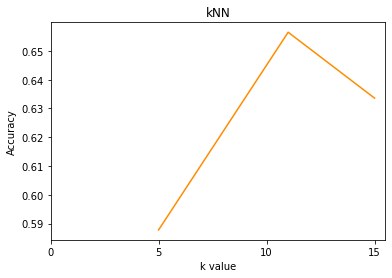

C=0.01，准确率：0.618
C=1，准确率：0.656
C=100，准确率：0.626


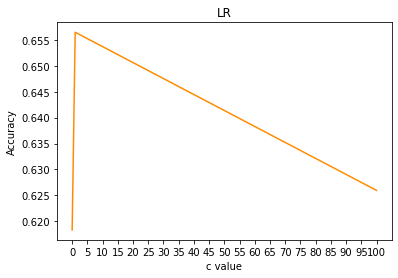

max_depth=5，准确率：0.557
max_depth=10，准确率：0.634
max_depth=15，准确率：0.626


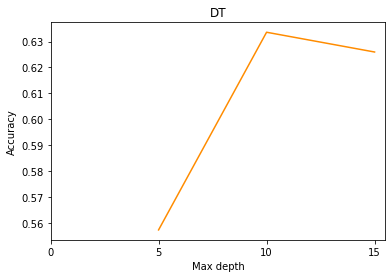

C=0.01，准确率：0.611
C=1，准确率：0.656
C=100，准确率：0.603


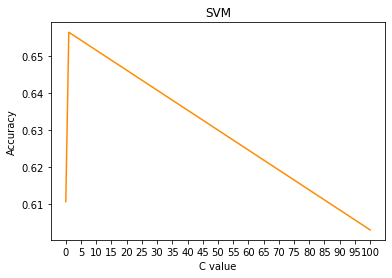

In [19]:
# 主程序
def main():
    model_name_param_dict={'kNN': [5, 11, 15],
                           'LR': [0.01, 1, 100],
                           'DT': [5, 10, 15],
                           'SVM': [0.01, 1, 100]}
    kNN(model_name_param_dict['kNN'])
    LR(model_name_param_dict['LR'])
    DT(model_name_param_dict['DT'])
    SVM(model_name_param_dict['SVM'])
    
main()